In [323]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from skimage.restoration import unwrap_phase
from scipy.fftpack import hilbert

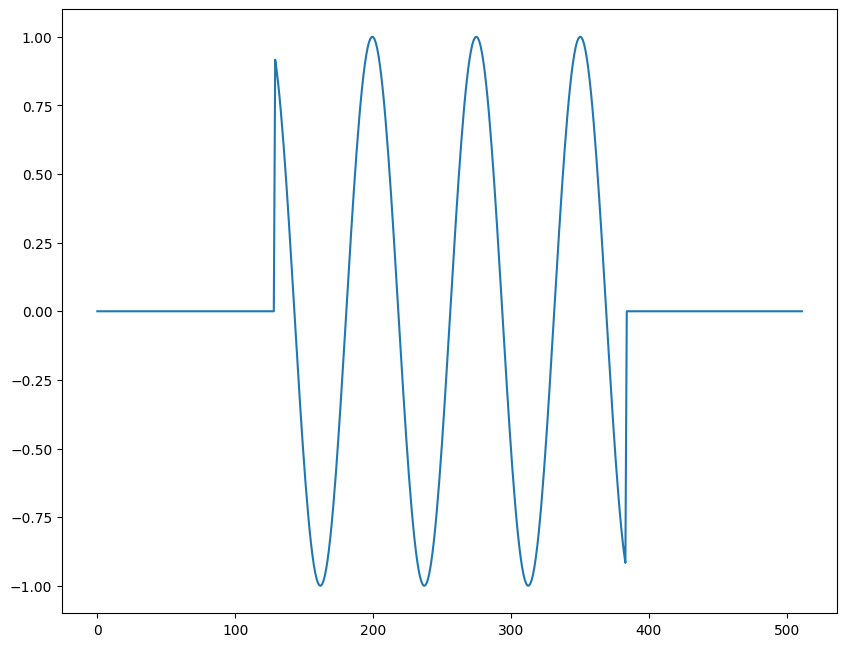

In [437]:
figure(figsize=(10, 8), dpi=100)
complex_field = np.load('../images/sin_0.5_intensity.npy')
# intensity_original = np.load('../images/i_z_32.000mm.npy')[256]
# phase_original = np.load('../images/p_z_32.000mm.npy')[256]
# plt.plot(unwrap_phase(phase_original))
intensity_original = np.abs(complex_field) ** 2
intensity_original[intensity_original == 0] = 0.00000001
phase_original = np.angle(complex_field)
plt.plot(phase_original)

In [519]:
def um2m(um):
    return um * 1e-6

px_size = 0.0000050059
wavelength = 0.000000555
k = 2 * np.pi / wavelength
hilbert_image = hilbert(np.log(intensity_original))
width = intensity_original.shape[0]
X = np.arange(-width // 2 * px_size, width // 2 * px_size, px_size)
# X = np.arange(-width // 2, width // 2)

result_field = np.array([
    np.exp((np.log(intensity_original[i])/2 + 1j * hilbert_image[i]) + 1j * k * X[i]) for i in range(width)
    # np.exp((np.log(intensity_original[i])/2 + 1j * hilbert_image[i]) + 1j * X[i]) for i in range(width)
])

In [520]:
res = np.log(intensity_original) / 2 + 1j * hilbert(np.log(intensity_original)) / 2
res = np.exp(np.array([res[i] + 1j * k * X[i] for i in range(width)]))
# res = np.exp(np.array([res[i] + 1j * X[i] for i in range(width)]))

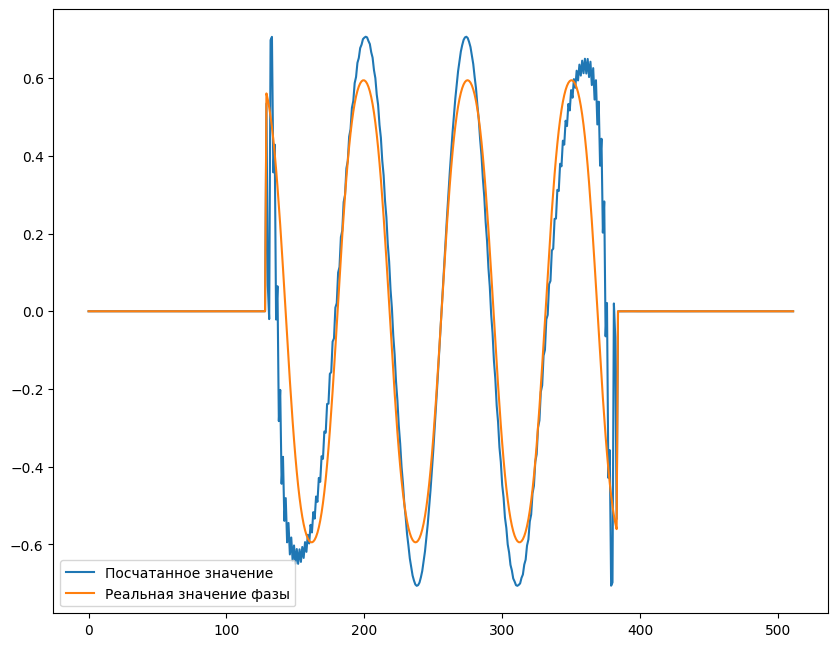

In [524]:
figure(figsize=(10, 8), dpi=100)
plt.plot(res.imag, label='Посчатанное значение')
plt.plot(complex_field.imag, label='Реальная значение фазы')
plt.legend()

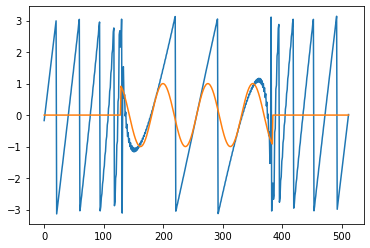

In [522]:
plt.plot(np.angle(res))
plt.plot(np.angle(complex_field))

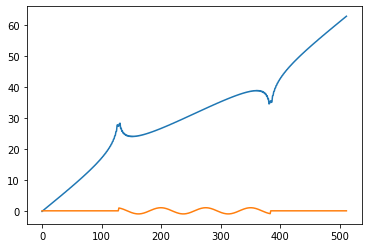

In [523]:
plt.plot(unwrap_phase(np.angle(res)))
plt.plot(unwrap_phase(np.angle(complex_field)))